<a href="https://colab.research.google.com/github/srishtidesai026/Ai-Voice-Assis/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("/content/imu_left_hand.csv")
df

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
0,0.0,-0.101538,0.033590,-0.024359,-2.821795,0.328462,9.353590,3.980769,11.375000,-6.500000,326.766026,-16.761218,-2.032051,0.947064,0.145190,-0.024686,0.282242
1,1.0,-0.107497,0.030879,-0.034786,-3.992821,0.467424,8.882149,1.282280,5.710317,-2.221230,327.299985,-24.143620,-3.047390,0.936725,0.207899,-0.034819,0.274534
2,2.0,-0.103074,0.045568,-0.033306,-4.364728,0.534122,8.726357,0.582650,2.218185,-0.798646,326.316718,-26.496221,-3.522052,0.930497,0.227834,-0.039307,0.281362
3,3.0,-0.104768,0.041132,-0.029409,-4.550206,0.550457,8.643766,0.256903,1.770986,-0.544368,325.736968,-27.687403,-3.652791,0.927022,0.237569,-0.042621,0.285437
4,4.0,-0.098436,0.031644,-0.026617,-4.709971,0.566092,8.563242,0.066243,0.660155,-0.072275,325.559823,-28.735840,-3.798125,0.924586,0.246286,-0.044734,0.286299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,952.0,-0.043770,-0.036095,-0.012063,-1.883004,0.906145,9.574952,0.019997,0.124894,0.153924,353.966130,-11.064422,-5.407182,0.992836,0.099128,0.041646,0.052039
953,953.0,-0.065716,-0.035112,-0.017120,-1.912550,0.914911,9.568109,0.050750,0.262699,0.164008,353.813484,-11.244081,-5.463495,0.992590,0.100749,0.041853,0.053416
954,954.0,-0.082648,-0.034149,-0.020092,-1.944545,0.922859,9.560893,0.035203,-0.009275,0.099066,353.678289,-11.434440,-5.515619,0.992340,0.102488,0.041966,0.054615
955,955.0,-0.087610,-0.032393,-0.022558,-1.954970,0.922143,9.559060,-0.019923,-0.166558,0.101675,353.565379,-11.496454,-5.511564,0.992231,0.103060,0.041840,0.055590


## Sanity Check


In [5]:
df.info()
#to check null, missing and duplicate values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          957 non-null    float64
 1   linaccel_x    957 non-null    float64
 2   linaccel_y    957 non-null    float64
 3   linaccel_z    957 non-null    float64
 4   gravity_x     957 non-null    float64
 5   gravity_y     957 non-null    float64
 6   gravity_z     957 non-null    float64
 7   gyro_x        957 non-null    float64
 8   gyro_y        957 non-null    float64
 9   gyro_z        957 non-null    float64
 10  euler_x       957 non-null    float64
 11  euler_y       957 non-null    float64
 12  euler_z       957 non-null    float64
 13  quaternion_w  957 non-null    float64
 14  quaternion_y  957 non-null    float64
 15  quaternion_x  957 non-null    float64
 16  quaternion_z  957 non-null    float64
dtypes: float64(17)
memory usage: 127.2 KB


,0
time,0
linaccel_x,0
linaccel_y,0
linaccel_z,0
gravity_x,0
gravity_y,0
gravity_z,0
gyro_x,0
gyro_y,0
gyro_z,0


In [6]:
#garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())


## Analysis

In [7]:
# to get statistical calculations
df.describe()

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,478.000000,-0.011191,-0.020674,-0.000122,-2.456023,0.779229,9.424011,0.017908,-0.008434,0.006323,335.671437,-14.545335,-4.713894,0.963325,0.131359,0.011539,0.202296
std,276.406404,0.081038,0.042377,0.023461,0.632328,0.239598,0.185455,0.717871,1.149488,1.231824,14.626088,3.865208,1.435031,0.022812,0.032547,0.023901,0.105567
min,0.000000,-0.158948,-0.151162,-0.148863,-4.793085,-3.050673,8.423685,-17.000958,-6.852645,-31.864365,147.528060,-29.274997,-7.082717,0.910548,0.053703,-0.178886,0.012284
25%,239.000000,-0.081371,-0.046253,-0.017515,-2.774627,0.709839,9.356514,-0.058518,-0.396656,-0.114415,325.406695,-16.438447,-5.451411,0.943648,0.108104,-0.002473,0.077870
50%,478.000000,-0.026044,-0.017752,-0.003252,-2.434131,0.824313,9.457806,0.001836,-0.049132,0.012764,332.764516,-14.373690,-5.021825,0.960083,0.131532,0.005379,0.232139
75%,717.000000,0.063316,0.006040,0.016137,-2.042516,0.910306,9.545435,0.083518,0.251454,0.142144,350.901674,-12.017540,-4.342880,0.989494,0.147741,0.036928,0.290593
max,956.000000,0.169029,0.299386,0.147960,-0.821082,1.205004,9.697944,9.622525,12.653185,14.289246,357.093952,-4.867822,18.924797,0.996004,0.250859,0.052035,0.350174


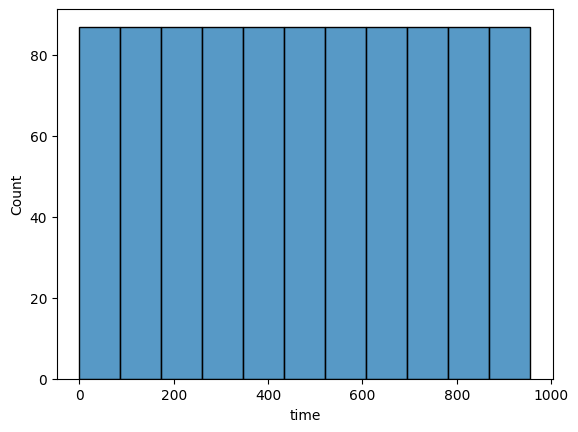

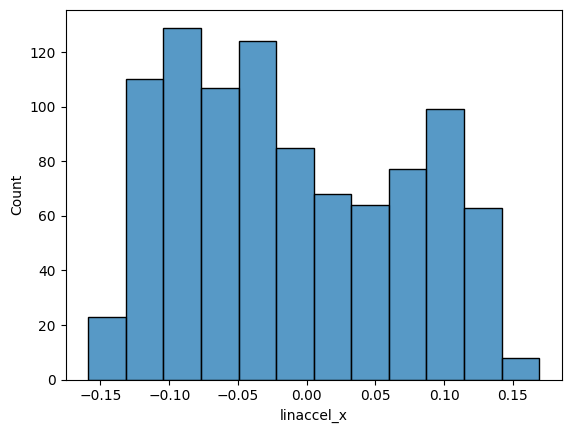

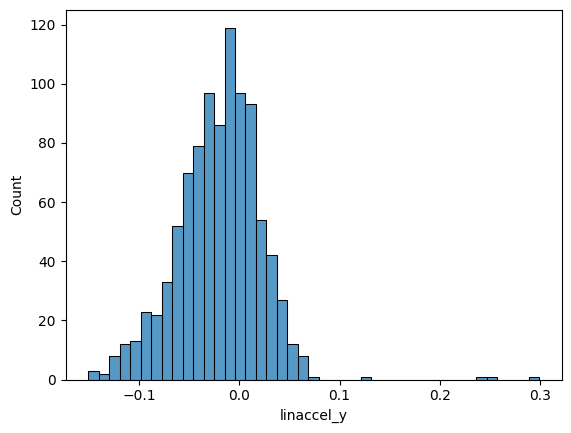

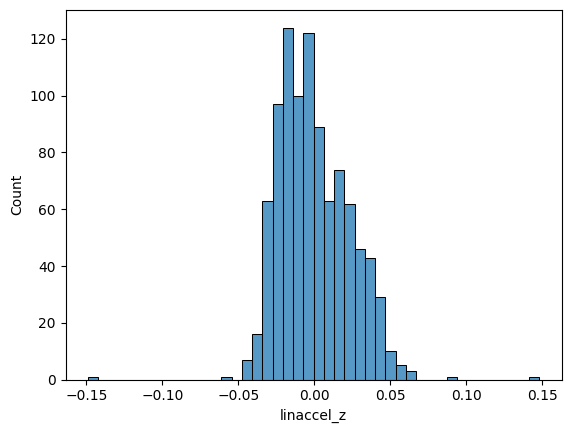

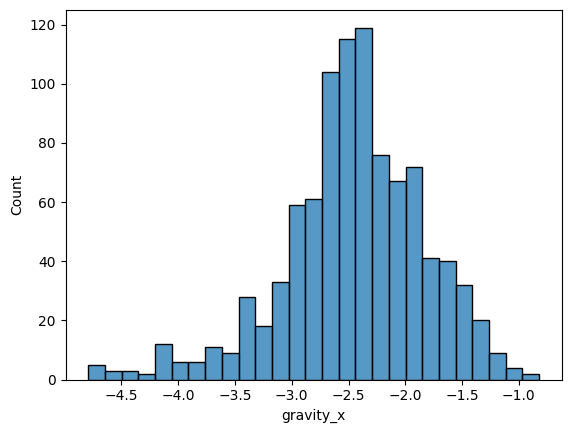

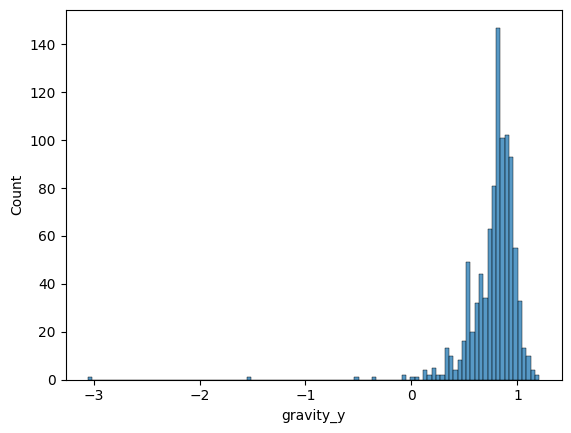

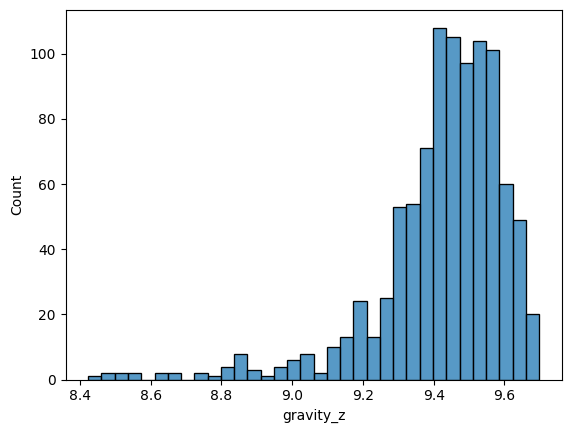

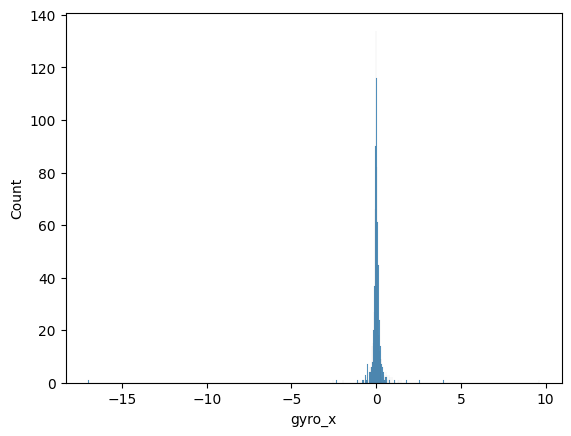

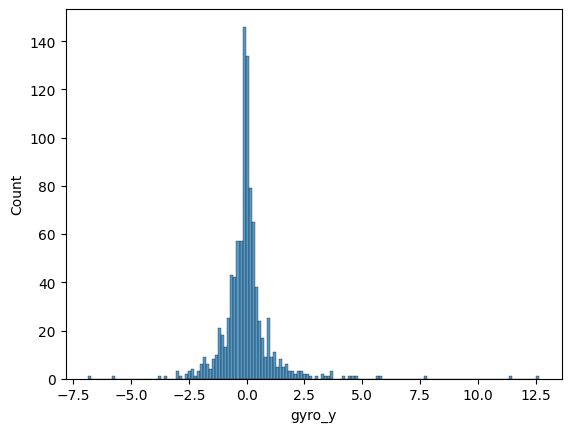

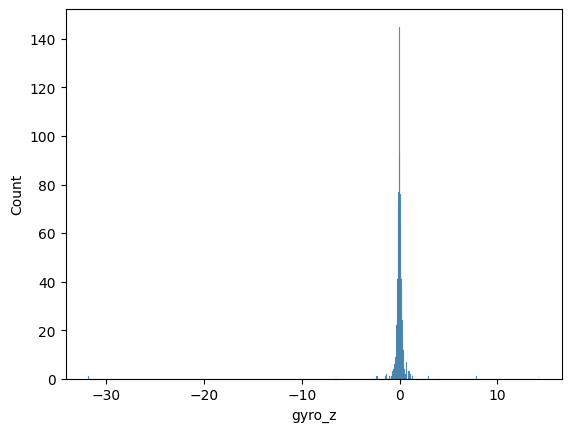

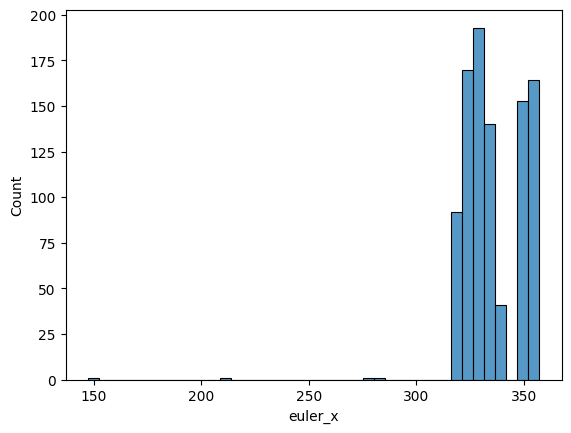

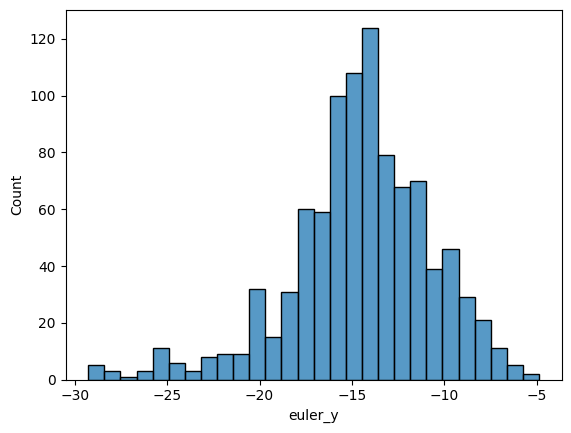

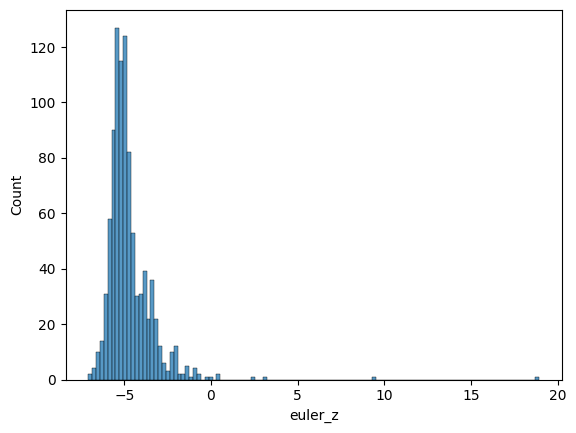

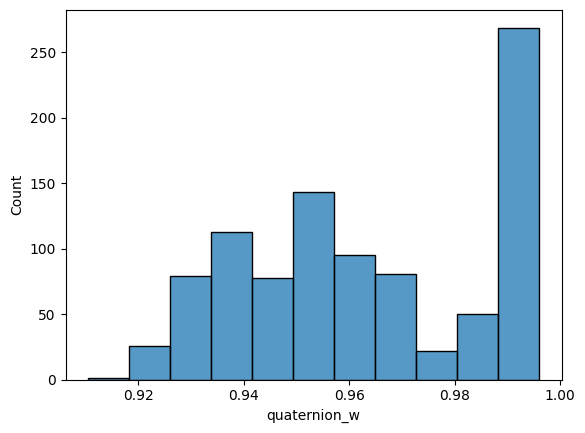

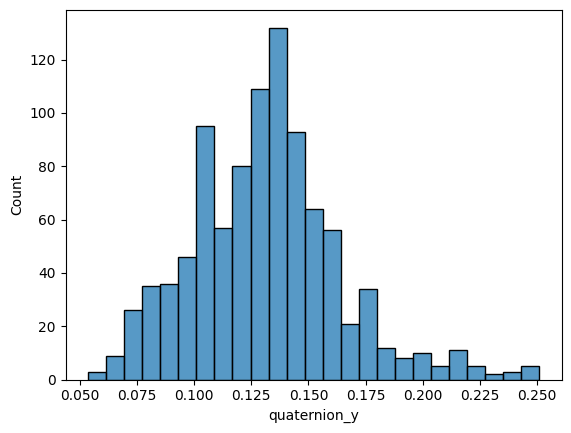

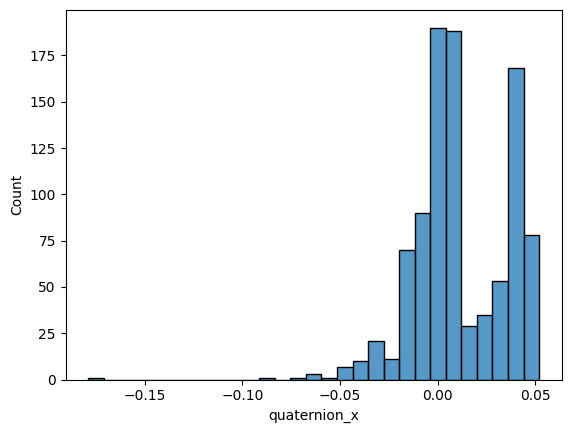

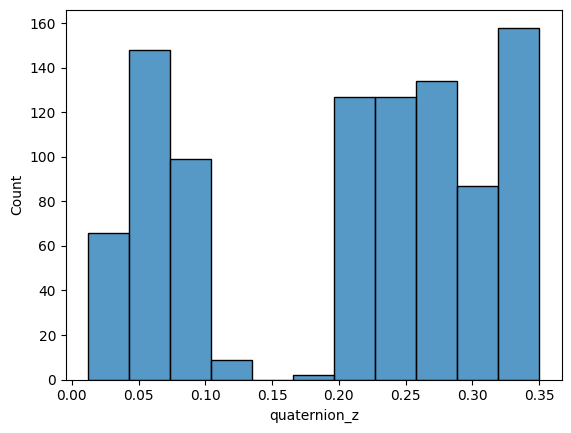

In [8]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(df[i])
  plt.show()

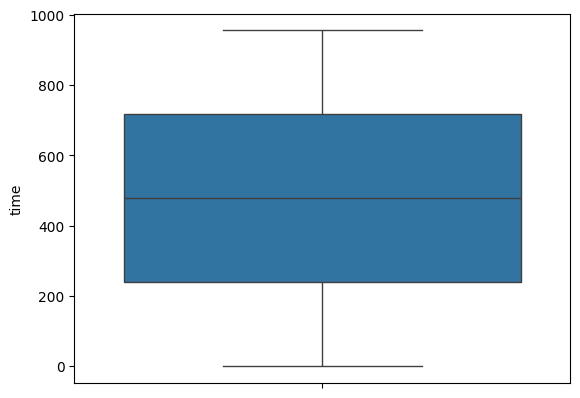

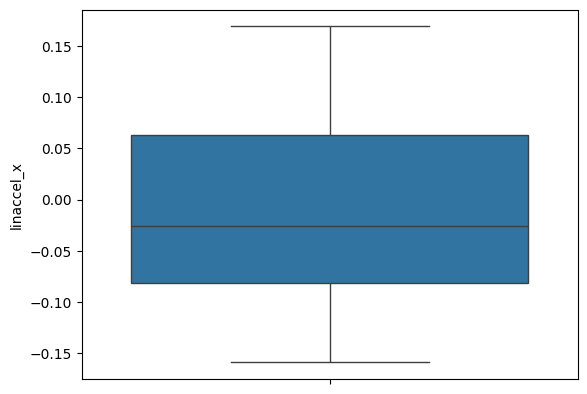

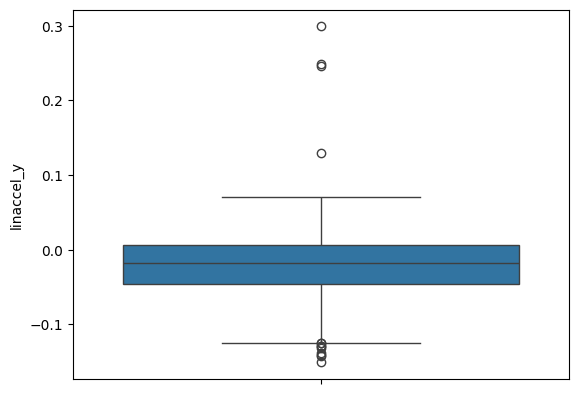

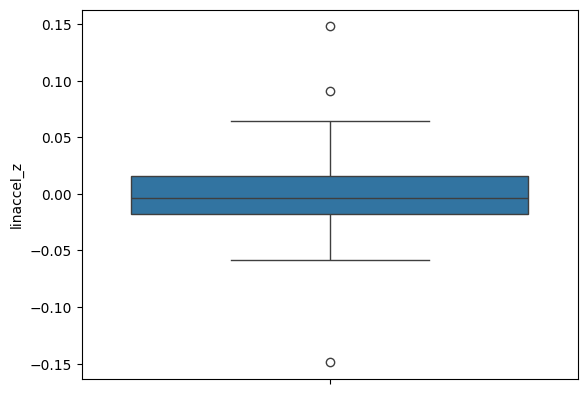

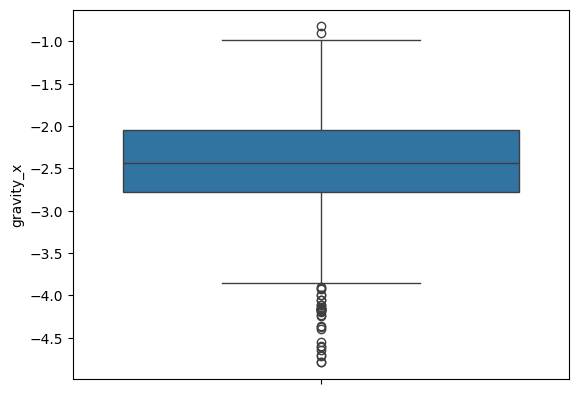

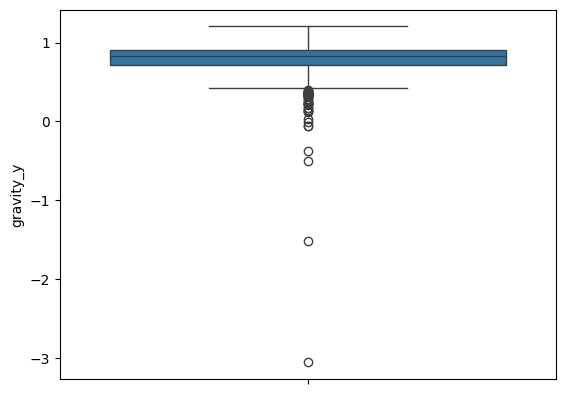

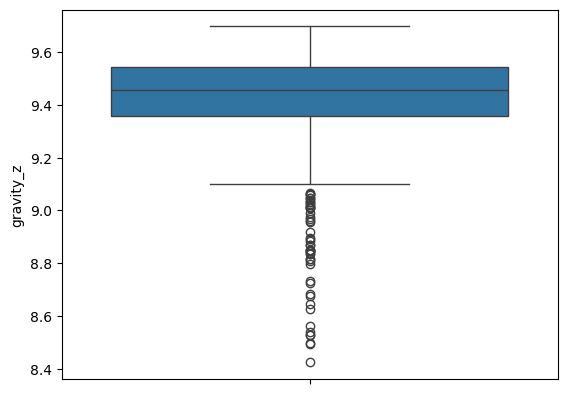

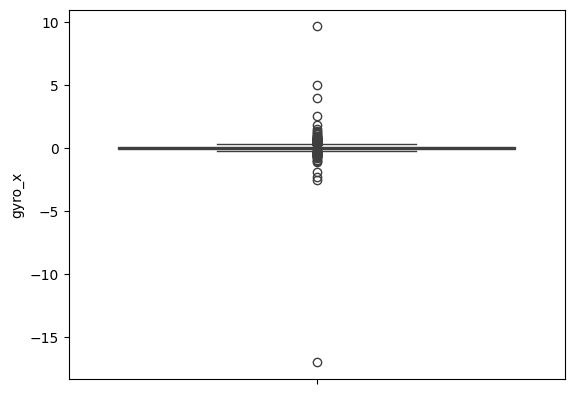

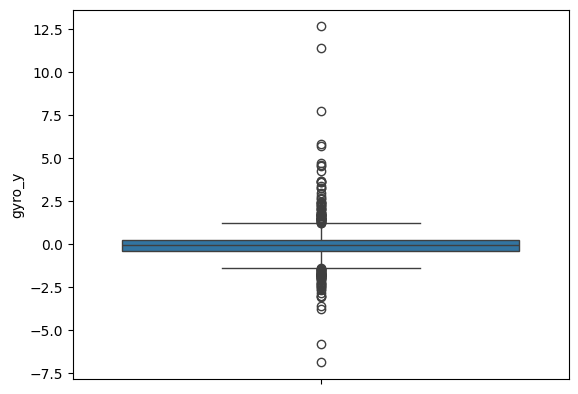

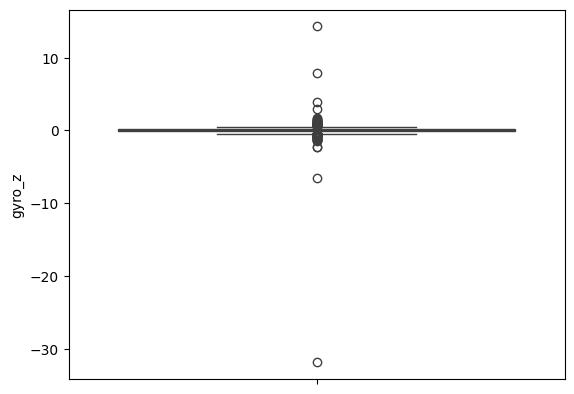

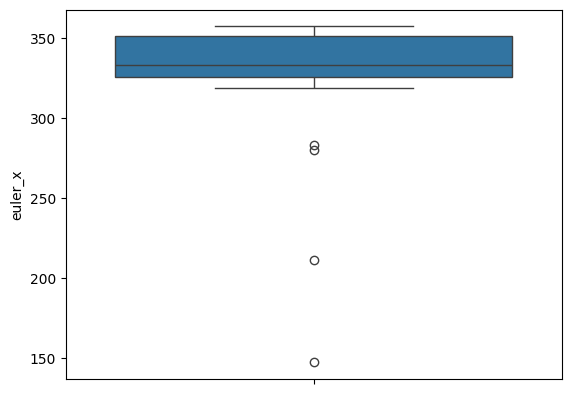

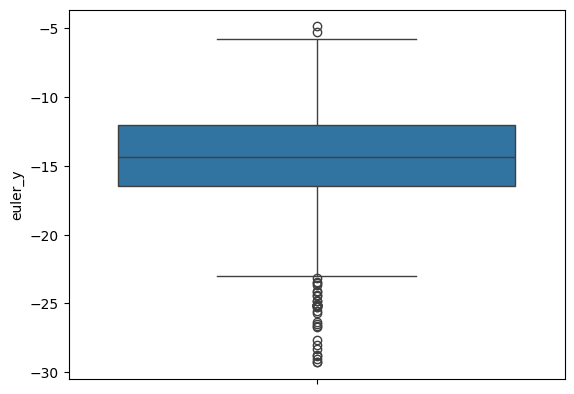

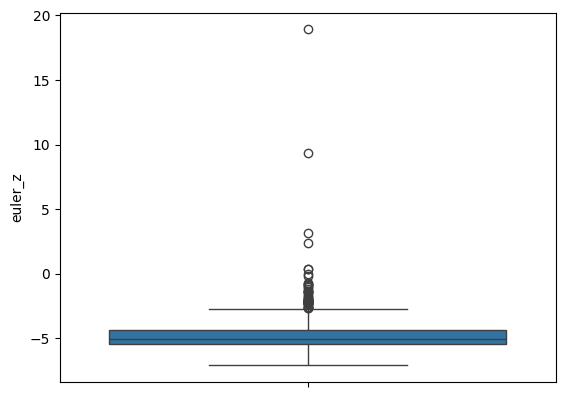

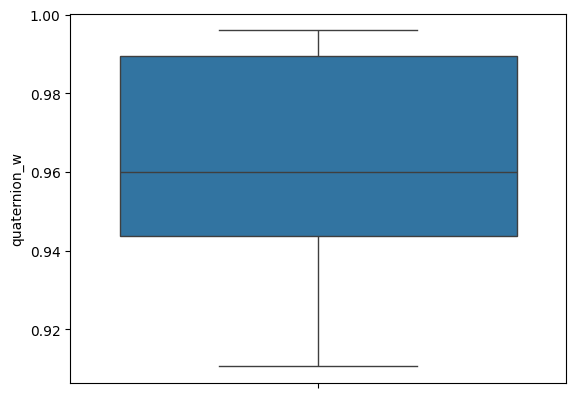

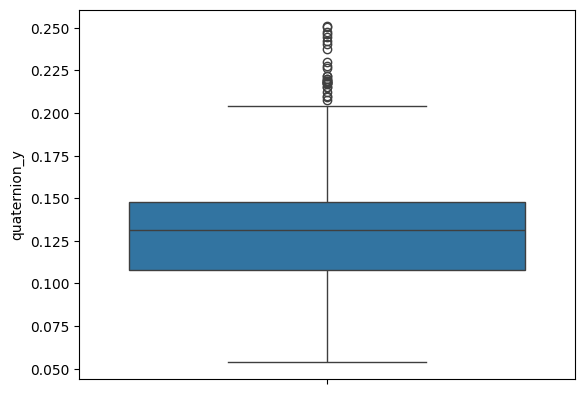

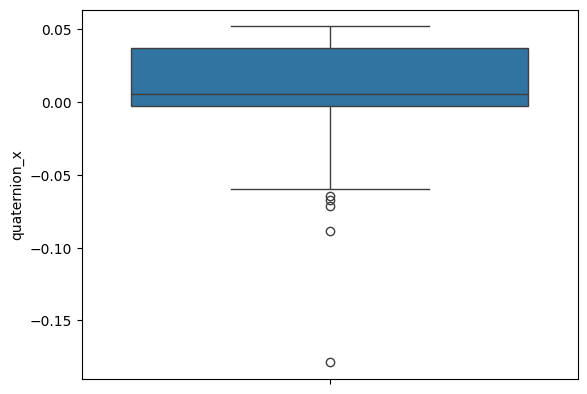

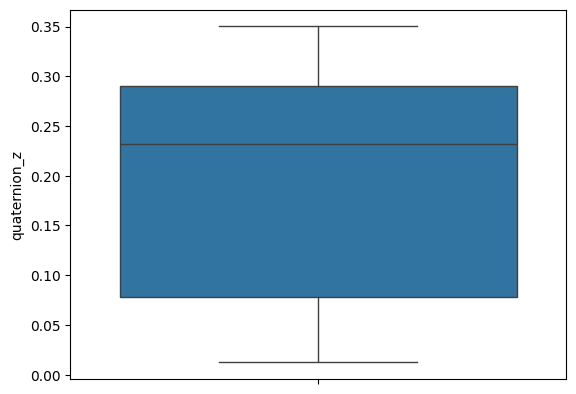

In [ ]:
df = pd.read_csv("/content/imu_left_hand.csv")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(df[i])
  plt.show()

In [9]:
df.select_dtypes(include="number").columns

Index(['time', 'linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x',
       'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'euler_x',
       'euler_y', 'euler_z', 'quaternion_w', 'quaternion_y', 'quaternion_x',
       'quaternion_z'],
      dtype='object')

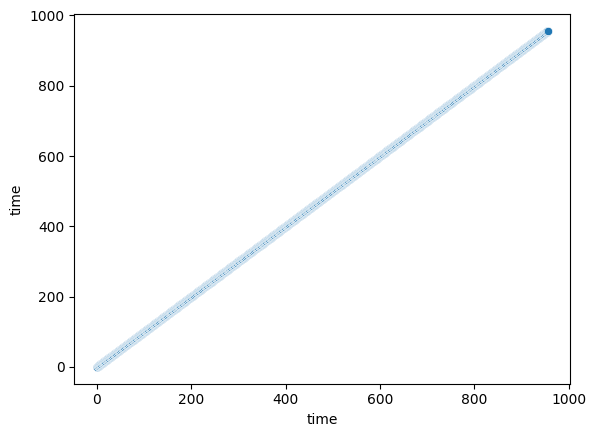

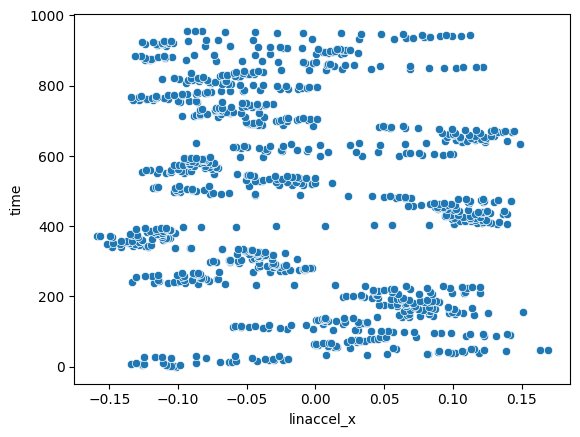

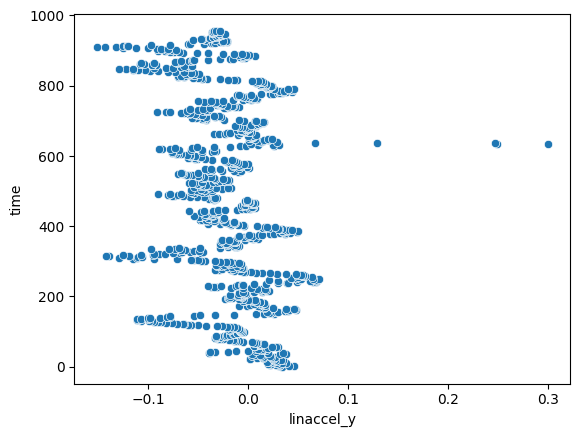

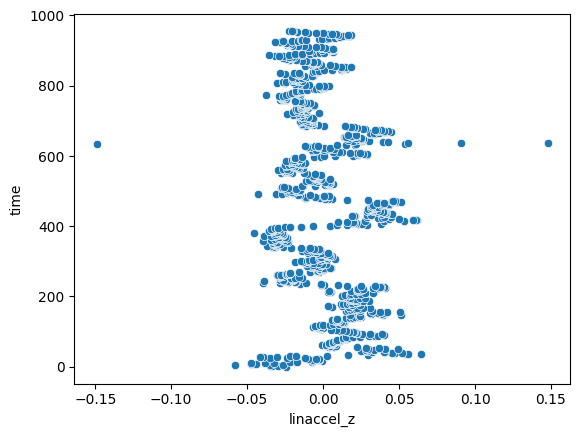

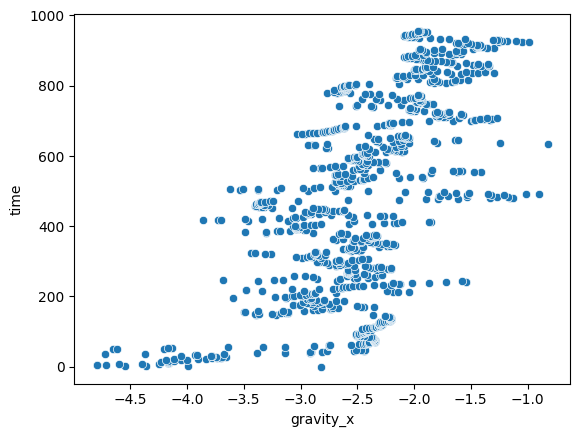

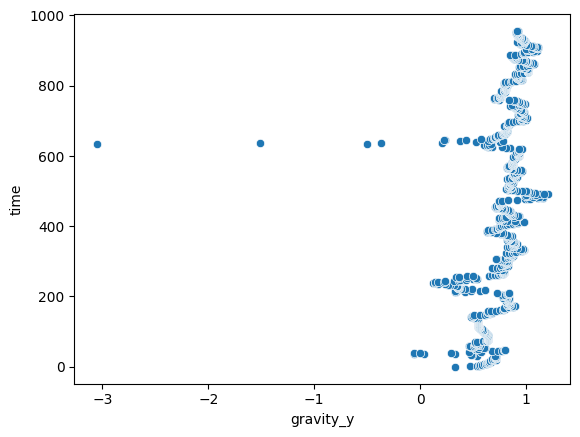

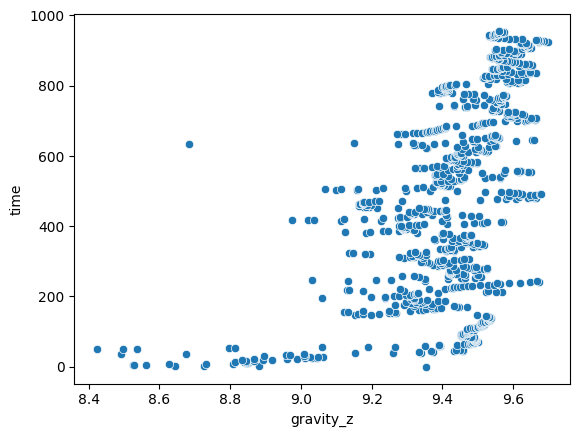

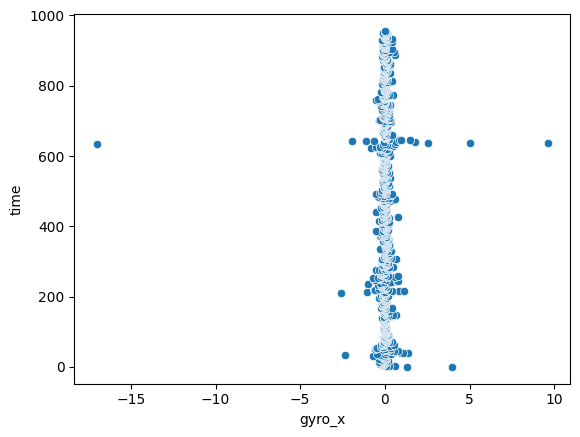

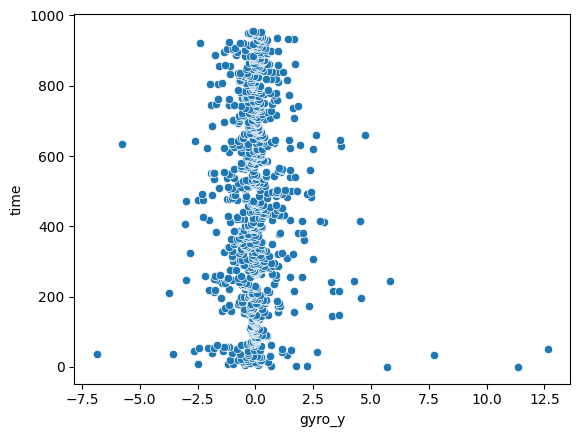

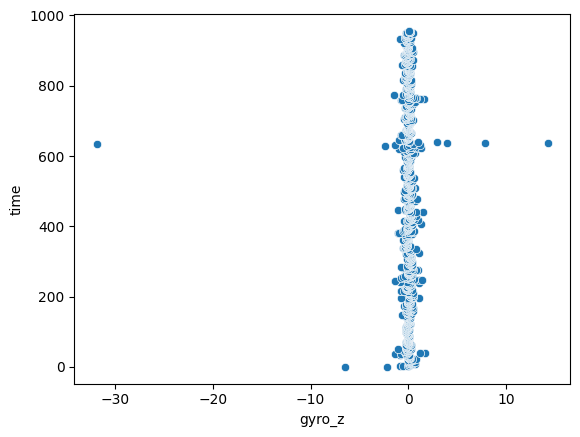

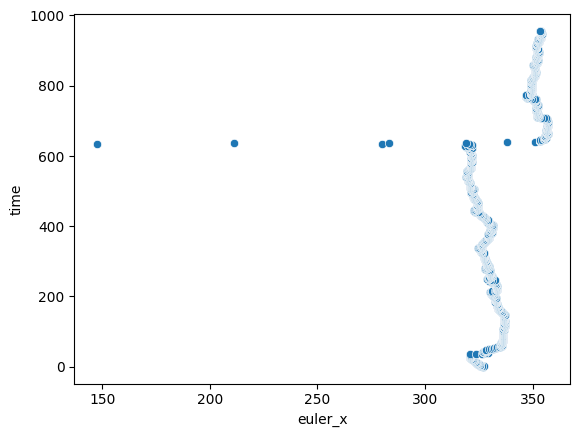

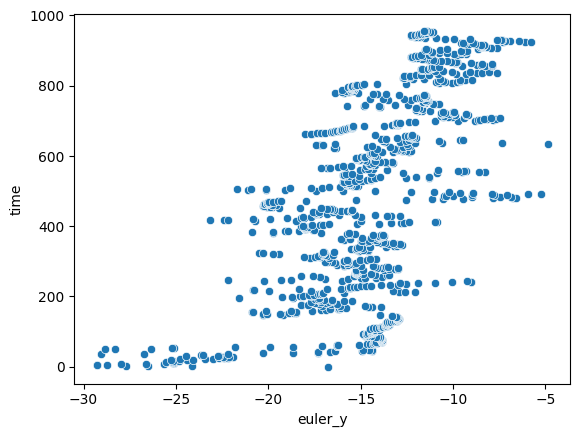

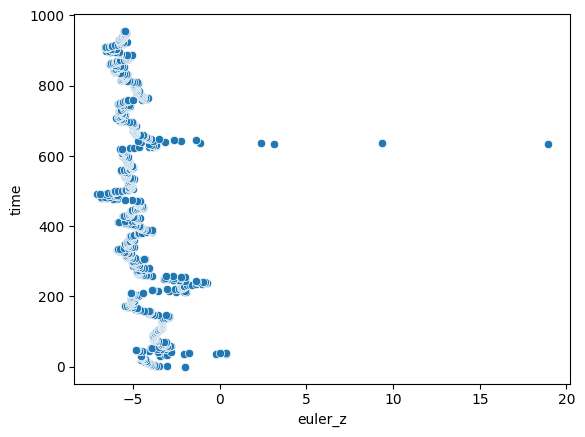

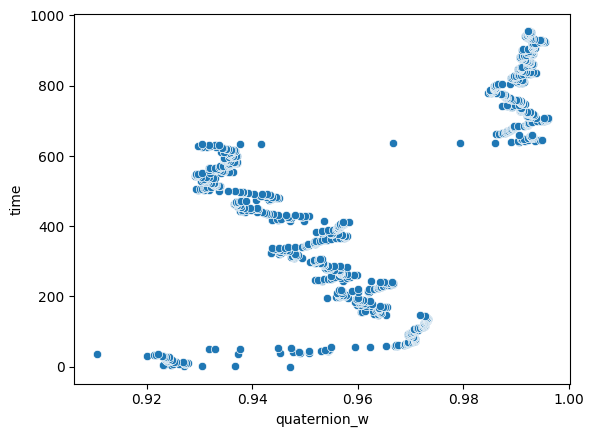

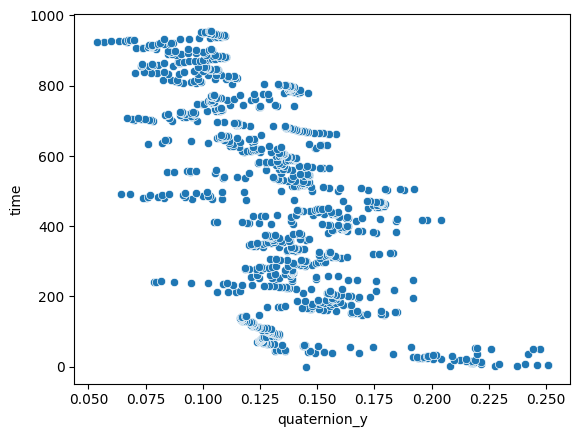

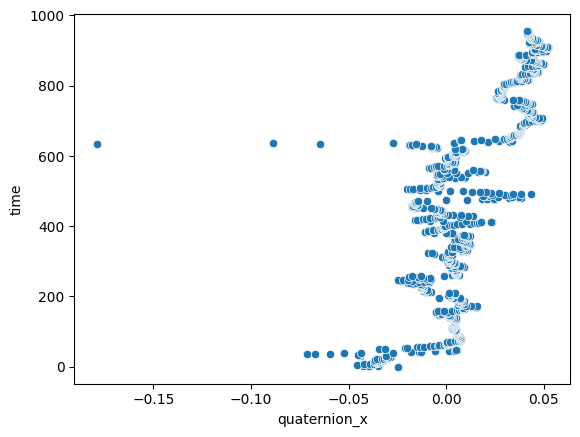

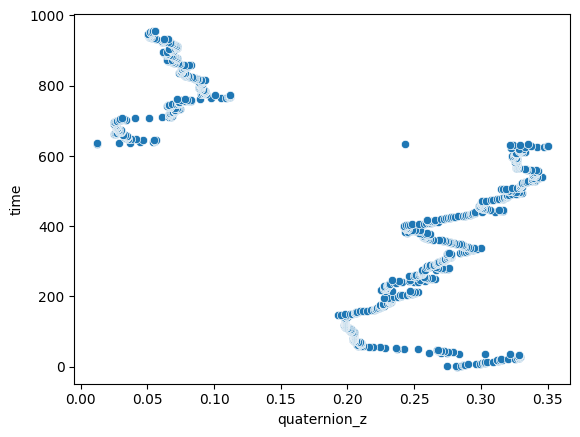

In [10]:
for i in ['time', 'linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x',
       'gravity_y', 'gravity_z', 'gyro_x', 'gyro_y', 'gyro_z', 'euler_x',
       'euler_y', 'euler_z', 'quaternion_w', 'quaternion_y', 'quaternion_x',
       'quaternion_z']:
  sns.scatterplot(data=df,x=i,y='time')
  plt.show()

In [11]:
df.corr()

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
time,1.000000,-0.194675,-0.264041,-0.232759,0.610244,0.458570,0.536316,0.009212,-0.030476,-0.000063,0.499577,0.608551,-0.427362,0.554883,-0.620002,0.740142,-0.611429
linaccel_x,-0.194675,1.000000,-0.019885,0.860020,-0.144018,-0.145511,-0.118733,0.006079,0.040316,0.033294,0.004649,-0.141945,0.140118,0.022397,0.139518,-0.076853,-0.037177
linaccel_y,-0.264041,-0.019885,1.000000,-0.023837,-0.343966,-0.591749,-0.391143,-0.035512,-0.055200,-0.085444,-0.253651,-0.344213,0.578715,-0.105411,0.333569,-0.428482,0.026585
linaccel_z,-0.232759,0.860020,-0.023837,1.000000,-0.254959,-0.170532,-0.195081,0.059369,0.081347,0.078363,-0.028108,-0.252141,0.158557,-0.037110,0.243521,-0.156612,0.022858
gravity_x,0.610244,-0.144018,-0.343966,-0.254959,1.000000,0.266816,0.934670,0.064894,-0.048992,0.007048,0.349838,0.999742,-0.209686,0.589683,-0.995578,0.719121,-0.482582
gravity_y,0.458570,-0.145511,-0.591749,-0.170532,0.266816,1.000000,0.365870,-0.060258,0.077859,0.004974,0.468623,0.268303,-0.998128,0.141476,-0.252729,0.666816,-0.086492
gravity_z,0.536316,-0.118733,-0.391143,-0.195081,0.934670,0.365870,1.000000,0.034621,-0.046919,-0.010232,0.444130,0.940700,-0.314940,0.575953,-0.939474,0.746037,-0.415038
gyro_x,0.009212,0.006079,-0.035512,0.059369,0.064894,-0.060258,0.034621,1.000000,0.118519,0.816197,-0.049511,0.064717,0.064715,0.061982,-0.057923,0.026929,-0.076260
gyro_y,-0.030476,0.040316,-0.055200,0.081347,-0.048992,0.077859,-0.046919,0.118519,1.000000,-0.140000,0.061899,-0.053058,-0.081622,-0.012954,0.048348,0.025222,0.012942
gyro_z,-0.000063,0.033294,-0.085444,0.078363,0.007048,0.004974,-0.010232,0.816197,-0.140000,1.000000,-0.046184,0.007157,-0.004921,0.022012,0.002637,0.020894,-0.037051


<Figure size 1500x1500 with 0 Axes>

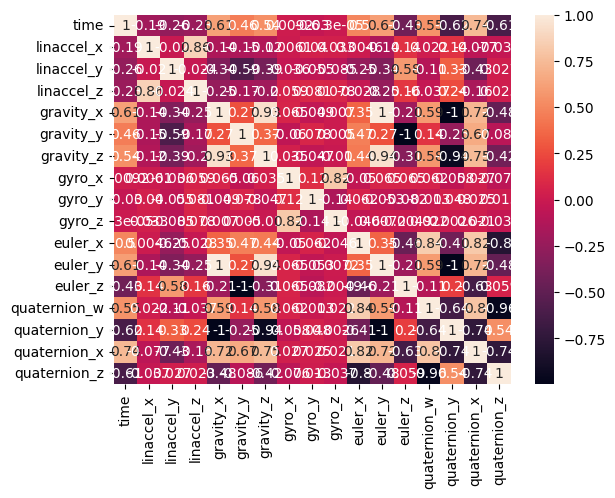

<Figure size 1500x1500 with 0 Axes>

In [12]:
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)
plt.figure(figsize=(15,15))

## Training Model

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Features (X) and Target (y)
X = df[['linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x', 'gravity_y', 'gravity_z',
          'gyro_x', 'gyro_y', 'gyro_z', 'quaternion_w', 'quaternion_x', 'quaternion_y', 'quaternion_z']]
y = df[['euler_x', 'euler_y', 'euler_z']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train


,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,quaternion_w,quaternion_x,quaternion_y,quaternion_z
302,-0.056684,-0.047274,-0.009071,-2.689082,0.772102,9.392271,-0.064854,-0.036708,0.102789,0.951689,0.000525,0.144473,0.270874
467,0.111952,0.004742,0.040242,-3.352048,0.750000,9.178161,-0.016885,-0.130242,-0.044960,0.936926,-0.015837,0.177607,0.300628
294,-0.031198,-0.020399,-0.003053,-2.580829,0.810553,9.418036,0.056785,0.157775,0.119370,0.953462,0.004567,0.139591,0.267206
548,-0.057105,-0.065339,-0.005371,-2.672145,0.883226,9.385565,-0.056552,-0.074244,-0.035484,0.929324,-0.004315,0.145367,0.339428
465,0.086472,0.006354,0.036846,-3.362444,0.750323,9.174567,-0.001274,0.086016,0.056483,0.936890,-0.016018,0.178133,0.300393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.012395,-0.018597,0.005484,-2.417508,0.592968,9.478000,-0.067641,0.317288,0.095262,0.970868,0.004636,0.128222,0.202312
270,-0.045759,-0.002862,-0.008596,-2.575348,0.790000,9.420671,-0.048114,0.021634,0.026554,0.956685,0.004963,0.138897,0.255822
860,0.027917,-0.095835,-0.001146,-1.443682,1.025218,9.637203,0.217194,-1.317975,-0.609210,0.992780,0.046783,0.078025,0.077366
435,0.136181,-0.042159,0.043786,-2.905475,0.849683,9.318978,-0.006746,0.484833,0.253148,0.943165,-0.002361,0.156607,0.293066


In [14]:
X_test

,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,quaternion_w,quaternion_x,quaternion_y,quaternion_z
835,-0.052512,-0.057140,-0.019228,-1.487270,0.949941,9.639887,0.051039,-0.744622,0.179880,0.992751,0.042799,0.080001,0.078498
477,0.103758,-0.032537,0.003410,-1.790114,1.016039,9.578323,0.081155,-0.426988,0.250309,0.943462,0.020653,0.103865,0.313825
350,-0.142492,-0.028411,-0.031669,-2.188919,0.894048,9.510637,0.091835,-0.930292,-0.310030,0.951812,0.012329,0.121170,0.281379
890,0.000067,-0.013993,-0.013672,-1.627057,0.975719,9.613451,-0.032152,0.238845,-0.202698,0.993065,0.044717,0.086706,0.065045
854,0.116871,-0.057097,0.011952,-1.832613,0.930226,9.582718,0.113962,-0.360988,0.188155,0.991194,0.040269,0.097726,0.079681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.098605,0.003197,0.039844,-3.374670,0.754658,9.169617,0.017857,0.316740,0.040369,0.936764,-0.016044,0.178825,0.300355
673,0.129979,-0.008586,0.038060,-2.711619,0.809330,9.384417,-0.034515,0.147944,-0.220774,0.988774,0.037658,0.141278,0.030516
33,0.007470,0.006461,0.016091,-3.931974,0.490638,8.956937,-0.279707,-0.315768,-0.024378,0.921411,-0.044547,0.202003,0.328557
31,-0.058726,0.021508,-0.017532,-3.787137,0.709839,9.008839,-0.238760,0.616028,-0.109073,0.922913,-0.030948,0.198531,0.328382


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
print(train_pred)
print(test_pred)

[[328.90109121 -15.91833465  -4.70546908]
 [323.84935683 -19.98819354  -4.65468949]
 [328.91567827 -15.25701954  -4.9203239 ]
 ...
 [352.26032599  -8.47161957  -6.07311311]
 [325.27038802 -17.24006055  -5.19715514]
 [336.00240087 -14.21367911  -3.56949905]]
[[ 3.51039948e+02 -8.72204430e+00 -5.62462142e+00]
 [ 3.23857073e+02 -1.05236802e+01 -6.06579985e+00]
 [ 3.26476762e+02 -1.28734639e+01 -5.37375226e+00]
 [ 3.53696419e+02 -9.55826791e+00 -5.80090826e+00]
 [ 3.52769837e+02 -1.07752234e+01 -5.55743130e+00]
 [ 3.31189346e+02 -1.35432828e+01 -4.25427871e+00]
 [ 3.33029814e+02 -1.32493160e+01 -1.98405558e+00]
 [ 3.24229451e+02 -1.53981050e+01 -5.89754253e+00]
 [ 3.35818539e+02 -1.41439036e+01 -3.85994101e+00]
 [ 3.53652721e+02 -7.98669624e+00 -6.57512628e+00]
 [ 3.20927521e+02 -1.45064222e+01 -5.31752161e+00]
 [ 3.35037135e+02 -1.42813852e+01 -3.11484003e+00]
 [ 3.33012915e+02 -2.08500768e+01 -3.82119975e+00]
 [ 3.53953572e+02 -1.10628735e+01 -5.41003256e+00]
 [ 3.21545124e+02 -1.3304379

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

train_MSE = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

test_MSE = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(train_MSE)
print(train_r2)
print(test_MSE)
print(test_r2)

0.8309232425691704
0.9946270097171818
7.274509651494641
0.98262827837506


In [18]:
lr_results = pd.DataFrame(['LinearRegression', train_MSE, train_r2, test_MSE, test_r2]).transpose()
lr_results.columns = ['Model', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']
lr_results

,Model,Training_MSE,Training_R2,Testing_MSE,Testing_R2
0,LinearRegression,0.830923,0.994627,7.27451,0.982628


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

train_MSE = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

test_MSE = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(train_MSE)
print(train_r2)
print(test_MSE)
print(test_r2)

0.4715627027677937
0.9863752433620331
66.26154327749451
0.6474564901079283


In [20]:
rf_results = pd.DataFrame(['RandomForestRegressor', train_MSE, train_r2, test_MSE, test_r2]).transpose()
rf_results.columns = ['Model', 'Training_MSE', 'Training_R2', 'Testing_MSE', 'Testing_R2']
rf_results

,Model,Training_MSE,Training_R2,Testing_MSE,Testing_R2
0,RandomForestRegressor,0.471563,0.986375,66.261543,0.647456


In [21]:
# LinearRegression and Randomforest
df_compare = pd.concat([lr_results, rf_results], axis =0)
df_compare

,Model,Training_MSE,Training_R2,Testing_MSE,Testing_R2
0,LinearRegression,0.830923,0.994627,7.27451,0.982628
0,RandomForestRegressor,0.471563,0.986375,66.261543,0.647456
